# Intro to Data Science Final Tutorial
### Introduction Data Scicence - Professor Nicholas Mattei
### Zekun Wu, Tianhao Wu


https://wuslash0.github.io



Data source: https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset

https://www.census.gov/newsroom/press-kits/2018/pop-estimates-national-state.html

http://worldpopulationreview.com/e5cc582b-5aef-4049-a59e-c86ec83c0ed9


We choose the data of "bad driver" because this dataset is mainly focused on the number of accidents each driver involved and how many of them are caused by multiple reasons like alcohol or speeding and so on. The number of people who died in car accident has increase all these years. The people who died in the vehicle accident has become the top reason of fatal accident. Consequently, we want to explore some relationship between the fatal accident and the reason behind it. 

This dataset includes all the 52 states in America, which means the size of the data is large. Most of the data number is from national Commissioners or administration. We can analyze the relationship between each driver's accident rate and their insurance rates, thus we can evaluate how well the insurance company's quote system works. For example, if we find out that a state has a relatively high insurance rate, but the accident rates are not comparably high, we can then conclude that the insurance company is not fair to the drivers in that state. This is a social issue that is related to lots of citizens. This dataset has tons of numerical data. Some of them are an interval, as the “number of drivers involved in fatal collisions per billion miles”. Some of them are Ratio, like “Percentage of Drivers Involved In Fatal Collisions Who Were Speeding”. The size of this data set is perfect for our tutorial. If the dataset is too large, it will take too much time to compile, which is not good for presenting. 



# Extraction, Transform, and Load¶


### Loading both datasets and concatenation

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("seaborn")

df_driver = pd.read_csv("./data/bad-drivers.csv")
df_driver.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


In [71]:
df_raw=df_driver 


**We are adding longitude and latitude to our data**

we want to make a folium later to see are there any relationship between the geographical location with the fatal rate and the insurance premium. 

In [72]:
location = pd.read_csv("./data/statelatlong.csv")
location = location.drop(columns=['State'])
location = location.rename(columns={'City':'State'})
location.head()


,Latitude,Longitude,State
0,32.601011,-86.680736,Alabama
1,61.302501,-158.775020,Alaska
2,34.168219,-111.930907,Arizona
3,34.751928,-92.131378,Arkansas
4,37.271875,-119.270415,California


In [73]:
#merge the the longitude and latitude dataset
merged_left = pd.merge(left=df_raw,right=location, how='left', left_on='State', right_on='State')
df_raw = merged_left

df_raw.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($),Latitude,Longitude
0,Alabama,18.8,39,30,96,80,784.55,145.08,32.601011,-86.680736
1,Alaska,18.1,41,25,90,94,1053.48,133.93,61.302501,-158.775020
2,Arizona,18.6,35,28,84,96,899.47,110.35,34.168219,-111.930907
3,Arkansas,22.4,18,26,94,95,827.34,142.39,34.751928,-92.131378
4,California,12.0,35,28,91,89,878.41,165.63,37.271875,-119.270415


**Reading, adding,and renaming the density dataset**

We also want to include the factor of how population involved towards to the reason for fatality in car accident.Thus, we join the population data according to the state at the same year for the preparation of our data analysis. 

In [74]:
density = pd.read_csv("./data/density.csv")
merged_left = pd.merge(left=df_raw,right=density, how='left', left_on='State', right_on='State')
density = density.rename(columns={'Pop':'Poplation'})
df_raw = merged_left

density.head()

,State,Density,Poplation,LandArea
0,District of Columbia,11665.0984,711571,61
1,New Jersey,1213.2917,8922547,7354
2,Rhode Island,1021.9903,1056738,1034
3,Massachusetts,889.6632,6939373,7800
4,Connecticut,736.8589,3567871,4842


**Reading, adding,and renaming the death_rate dataset**

In [75]:
df10 = pd.read_csv("./data/Motor_Vehicle_Occupant_Death_Rate__by_Age_and_Gender__2012___2014__All_States.csv")

df10 = df10[['All Ages, 2012','State']]

death_rate = df10.rename(columns={"All Ages, 2012": "Death_rate"})

merged_left = pd.merge(left=df_raw,right=death_rate, how='left', left_on='State', right_on='State')

merged_left

df_raw = merged_left
df_raw.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($),Latitude,Longitude,Density,Pop,LandArea,Death_rate
0,Alabama,18.8,39,30,96,80,784.55,145.08,32.601011,-86.680736,96.7173,4898246,50645,13.7
1,Alaska,18.1,41,25,90,94,1053.48,133.93,61.302501,-158.775020,1.2893,735720,570641,5.4
2,Arizona,18.6,35,28,84,96,899.47,110.35,34.168219,-111.930907,64.0445,7275070,113594,7.4
3,Arkansas,22.4,18,26,94,95,827.34,142.39,34.751928,-92.131378,58.1611,3026412,52035,13.8
4,California,12.0,35,28,91,89,878.41,165.63,37.271875,-119.270415,255.1516,39747267,155779,4.2


### Transform the data from percentage to decimal for easier plotting


In [76]:
per_columns = ["Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding",
                     "Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired",
                     "Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted",
                     "Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents"
                     ]
df_raw[per_columns] = df_raw[per_columns].astype(float)/100
df_raw.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($),Latitude,Longitude,Density,Pop,LandArea,Death_rate
0,Alabama,18.8,0.39,0.30,0.96,0.80,784.55,145.08,32.601011,-86.680736,96.7173,4898246,50645,13.7
1,Alaska,18.1,0.41,0.25,0.90,0.94,1053.48,133.93,61.302501,-158.775020,1.2893,735720,570641,5.4
2,Arizona,18.6,0.35,0.28,0.84,0.96,899.47,110.35,34.168219,-111.930907,64.0445,7275070,113594,7.4
3,Arkansas,22.4,0.18,0.26,0.94,0.95,827.34,142.39,34.751928,-92.131378,58.1611,3026412,52035,13.8
4,California,12.0,0.35,0.28,0.91,0.89,878.41,165.63,37.271875,-119.270415,255.1516,39747267,155779,4.2


Here, we transform some of the negative percentage to the positive by distracting the negative percentage by 1

In [77]:
df_raw["Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted"] = 1 - df_raw["Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted"]
df_raw["Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents"] = 1 - df_raw["Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents"]
df_raw.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($),Latitude,Longitude,Density,Pop,LandArea,Death_rate
0,Alabama,18.8,0.39,0.30,0.04,0.20,784.55,145.08,32.601011,-86.680736,96.7173,4898246,50645,13.7
1,Alaska,18.1,0.41,0.25,0.10,0.06,1053.48,133.93,61.302501,-158.775020,1.2893,735720,570641,5.4
2,Arizona,18.6,0.35,0.28,0.16,0.04,899.47,110.35,34.168219,-111.930907,64.0445,7275070,113594,7.4
3,Arkansas,22.4,0.18,0.26,0.06,0.05,827.34,142.39,34.751928,-92.131378,58.1611,3026412,52035,13.8
4,California,12.0,0.35,0.28,0.09,0.11,878.41,165.63,37.271875,-119.270415,255.1516,39747267,155779,4.2


**Renaming the dataset**

Some of the variables name are too long and redundant. So we decide to tidy the data set by renaming some of its variables. 

In [78]:
new_name = ["state", 
                "num_driver_fatal",
                "percent_speeding", 
                "percent_alcohol", 
                "percent_distracted", 
                "percent_record", 
                "insurance_premium",
                "Insurance_lost_per_driver",
            ]

df_raw2=df_raw.rename(columns=dict(zip(df_raw.columns,new_name)))
#imputate with mean
df_raw2 = df_raw2.fillna(df_raw2.mean())
df_raw2.head()

,state,num_driver_fatal,percent_speeding,percent_alcohol,percent_distracted,percent_record,insurance_premium,Insurance_lost_per_driver,Latitude,Longitude,Density,Pop,LandArea,Death_rate
0,Alabama,18.8,0.39,0.30,0.04,0.20,784.55,145.08,32.601011,-86.680736,96.7173,4898246,50645,13.7
1,Alaska,18.1,0.41,0.25,0.10,0.06,1053.48,133.93,61.302501,-158.775020,1.2893,735720,570641,5.4
2,Arizona,18.6,0.35,0.28,0.16,0.04,899.47,110.35,34.168219,-111.930907,64.0445,7275070,113594,7.4
3,Arkansas,22.4,0.18,0.26,0.06,0.05,827.34,142.39,34.751928,-92.131378,58.1611,3026412,52035,13.8
4,California,12.0,0.35,0.28,0.09,0.11,878.41,165.63,37.271875,-119.270415,255.1516,39747267,155779,4.2


After we rename the variable name, our dataset looks much more clear and understandable.

**We want to take a look at our variables and make sure our variables have the correct data type**

In [79]:
df_raw2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 14 columns):
state                        51 non-null object
num_driver_fatal             51 non-null float64
percent_speeding             51 non-null float64
percent_alcohol              51 non-null float64
percent_distracted           51 non-null float64
percent_record               51 non-null float64
insurance_premium            51 non-null float64
Insurance_lost_per_driver    51 non-null float64
Latitude                     51 non-null float64
Longitude                    51 non-null float64
Density                      51 non-null float64
Pop                          51 non-null int64
LandArea                     51 non-null int64
Death_rate                   51 non-null float64
dtypes: float64(11), int64(2), object(1)
memory usage: 6.0+ KB


At this point, we've finished out data Extraction, Transformation and loaded our data successfully. 

Our main data det is the bad driver.cvs data set. We add some more variables that we think might be interesting to analysis. We merge the longtitude and latitude of each state because we want to make folium maps later to analysis the data. We also merge the ratio of population with it's area to see if population density have some thing to do with the insurance premium or the fatal rate. 
We have some missing data such as some of information about Washington DC， so we impute the NaN value by mean, which is the average value of the whole US. 

We are now ready for some Exploratory Data Analysis (EDA).

# Exploratory Data Analysis

First of all, we want to see some basic information about our data set like what's the mode value of each variables. We choose to use mode because we do not want some outliners affect our result. The mode graph is more general than just calculate the mean or medium of each variable

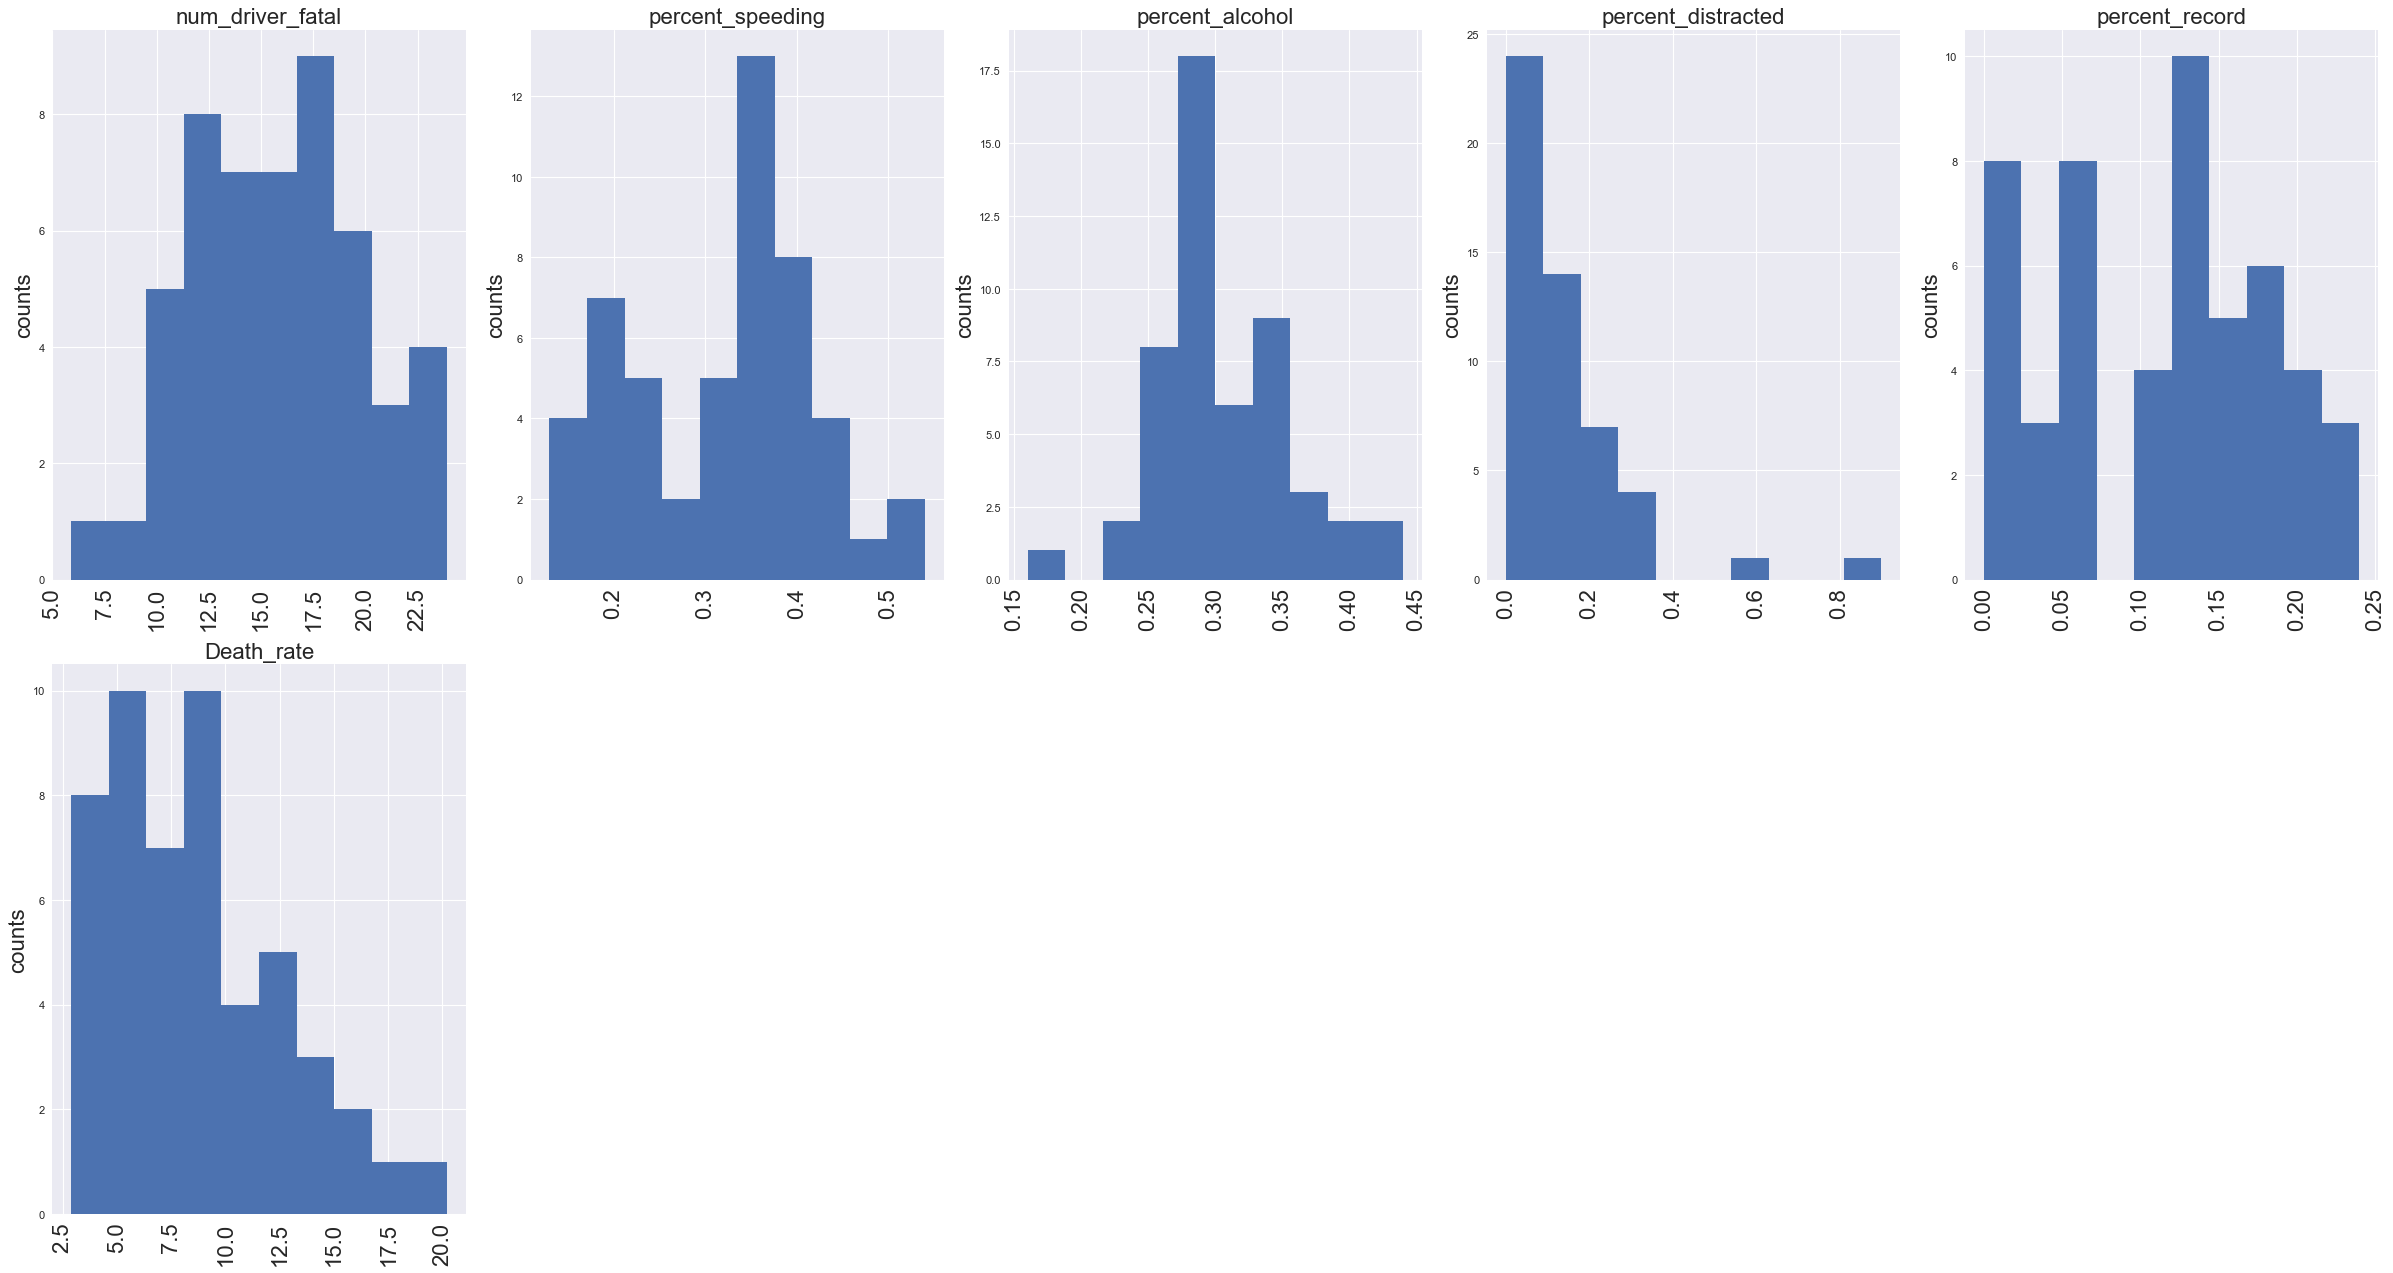

In [80]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts',size=20)
        plt.xticks(rotation = 90, size=20)
        plt.title(f'{columnNames[i]}',size =20)
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
plotPerColumnDistribution(df_raw2, 10, 5)


Now we want to make a folium map to see if there are some relationship between the different area （east coast west coast deep south for example) in the whole country.

**Install the `folium` package if not previously installed on the computer and restart the kernal**

!pip install folium

In [81]:
import folium
import requests
import pandas

dict2 = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

# thank you to @kinghelix and @trevormarburger for this idea
df_raw2['state']= df_raw2['state'].map(dict2) 


df_raw2.head()

,state,num_driver_fatal,percent_speeding,percent_alcohol,percent_distracted,percent_record,insurance_premium,Insurance_lost_per_driver,Latitude,Longitude,Density,Pop,LandArea,Death_rate
0,AL,18.8,0.39,0.30,0.04,0.20,784.55,145.08,32.601011,-86.680736,96.7173,4898246,50645,13.7
1,AK,18.1,0.41,0.25,0.10,0.06,1053.48,133.93,61.302501,-158.775020,1.2893,735720,570641,5.4
2,AZ,18.6,0.35,0.28,0.16,0.04,899.47,110.35,34.168219,-111.930907,64.0445,7275070,113594,7.4
3,AR,22.4,0.18,0.26,0.06,0.05,827.34,142.39,34.751928,-92.131378,58.1611,3026412,52035,13.8
4,CA,12.0,0.35,0.28,0.09,0.11,878.41,165.63,37.271875,-119.270415,255.1516,39747267,155779,4.2


In [82]:
my_USA_map = './data/us-states.json'
rate_map = folium.Map(location=[38, -98], zoom_start=4.4)

rate_map.choropleth(geo_data=my_USA_map, data=df_raw2,
             columns=['state', 'insurance_premium'],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Insurance_premium')
folium.LayerControl().add_to(rate_map)

rate_map
#https://github.com/bradtraversy/python_folium_example/blob/master/data/us-states.json


//anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


It turns out that Southern states tend to have higher insurace premium


Louisiana, New Jersey, and New York State are three states with the highest insurance premium


In [83]:
my_USA_map = './data/us-states.json'
speed_map = folium.Map(location=[38, -95], zoom_start=4.4)

speed_map.choropleth(geo_data=my_USA_map, data=df_raw2,
             columns=['state', 'num_driver_fatal'],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Number of drivers involved in fatal collisions per billion miles')
folium.LayerControl().add_to(speed_map)

speed_map

From the map we can see Southern and Northern States tend to have a larger number of fatal accidents

However, if we go back and forth we can see that there are no obvious relationship between the total number of fatal people cross the whole state and the average state insurance premium, which might not corresponding to our common sense. So we decide to explore deeper to see how each factor relates to each other.    

Then we want to see which states have the relatively high insurance premium. This is the main problem we what to discuss in our presentation. So we make a graph to see the top to bottom states ranking by insurance premium.

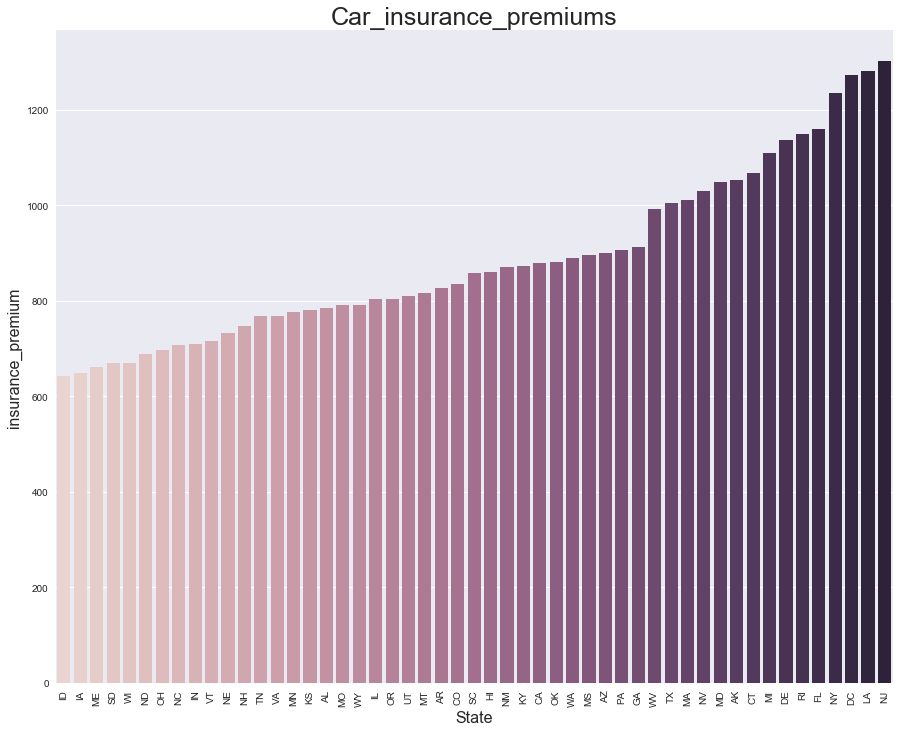

In [84]:
df_as=df_raw2.sort_values(by="insurance_premium" , ascending=True) 

plt.figure(figsize=(15,12))

sns.barplot(x=df_as['state'], y=df_as['insurance_premium'],palette=sns.cubehelix_palette(len(df_as['state'])))
plt.xticks(rotation= 90)
plt.xlabel('State',size = 16)
plt.ylabel('insurance_premium',size = 16)
plt.title('Car_insurance_premiums',fontsize=25)

plt.show()


Now we want to see how each variable relates to each other. We are trying to find out the corelation between variables. A heatmap can be the best choice to use here. 

Text(0.5, 1, 'Correlation Matrix for Bad Driver data frame')

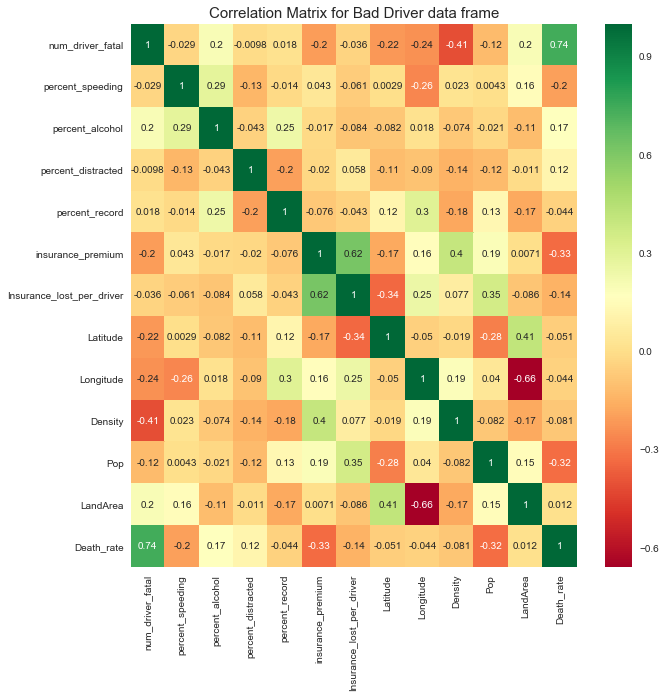

In [85]:
corrmat = df_raw2.corr() 
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df_raw2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

plt.title(f'Correlation Matrix for Bad Driver data frame', fontsize=15)


The next thing we are cruious about is the corelatinship between each driver's monthly insurance rate the total number of accidient rate happened in the state. So we make a scatter plot graph. 

Text(-1.5749999999999957, 0.5, 'State average insurance rate')

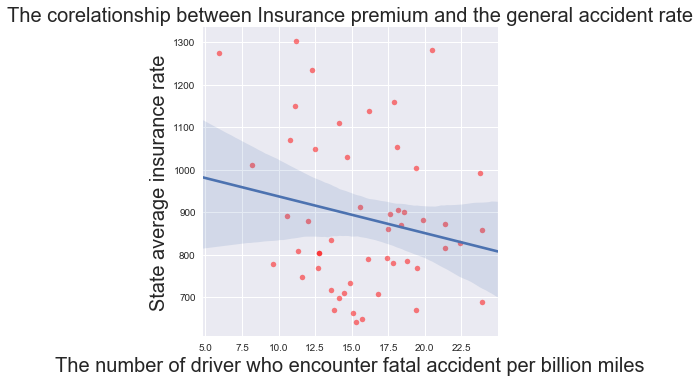

In [86]:
sns.lmplot(x='num_driver_fatal',y='insurance_premium',fit_reg=True,scatter_kws={"color":"red","alpha":0.5
                                                                               ,"s":30},data=df_raw2)
plt.title('The corelationship between Insurance premium and the general accident rate', fontsize=20)
plt.xlabel('The number of driver who encounter fatal accident per billion miles',size=20)
plt.ylabel('State average insurance rate',size=20)



In [87]:
df_raw2['num_driver_fatal'].corr(df_raw2['insurance_premium'])

-0.1997019456899423

According to the graph and the covarience value, there is no straight relationship between the insurance premium and the number of drivers involved in fatal collisions per billion miles, which can also be interpreted as the major accident heppene rate in each state. The covarience value is only -1.99. Sometimes the lower accident rate state driver can be charged more than those state with higher accident state. It looks unfair to our general knowledge.  We are trying to find out the quote system of the insurance company. In order to figure this out, we did a scatter plot between Losses incurred by insurance companies for collisions per insured driver and the insurance premium.

Text(-1.5749999999999957, 0.5, 'State Average Insurance Premium')

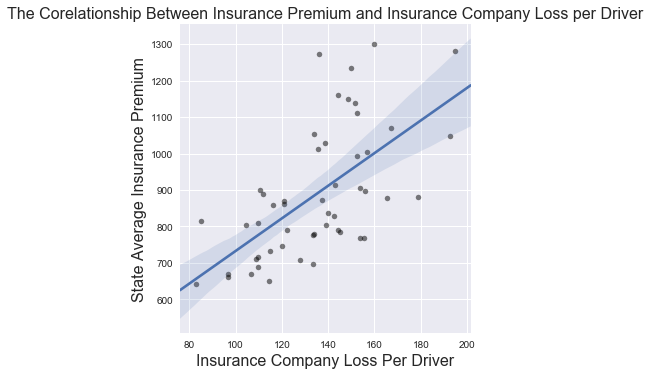

In [88]:
sns.lmplot(x='Insurance_lost_per_driver',y='insurance_premium',fit_reg=True,scatter_kws={"color":"black","alpha":0.5
                                                                               ,"s":30},data=df_raw2)
plt.title("The Corelationship Between Insurance Premium and Insurance Company Loss per Driver", fontsize=16)
plt.xlabel('Insurance Company Loss Per Driver',size=16)
plt.ylabel('State Average Insurance Premium',size=16)

**As we can see the graph show some extend of correlation so we want to do some more analysis to see its actual correlation in number**

we use the function below to calculate the correlation efficiency

In [89]:
df_raw2['Insurance_lost_per_driver'].corr(df_raw2['insurance_premium'])

0.6231164385197064

It turns out that the loss incurred and the insurance premium is positive correlated

**We also want to explore the correlation between population density and insurance premium. We draw the graph below**

Text(-1.5749999999999957, 0.5, 'State average insurance rate')

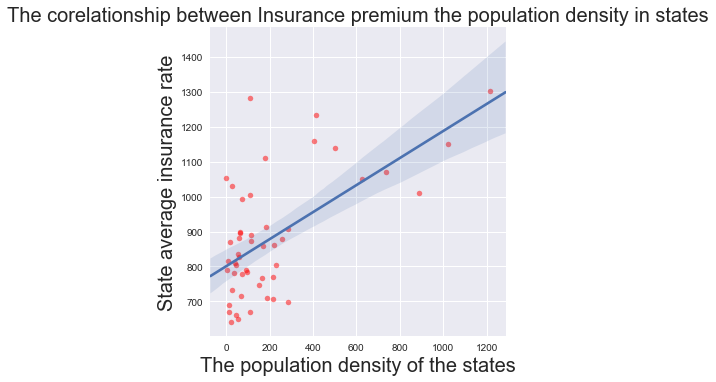

In [90]:
df_raw3 = df_raw2.drop([8])
sns.lmplot(x='Density',y='insurance_premium',fit_reg=True,scatter_kws={"color":"red","alpha":0.5
                                                                               ,"s":30},data=df_raw3)
plt.title('The corelationship between Insurance premium the population density in states', fontsize=20)
plt.xlabel('The population density of the states',size=20)
plt.ylabel('State average insurance rate',size=20)

There are no obvious relationship between each state and their population.

In [91]:
df_raw2.head()

,state,num_driver_fatal,percent_speeding,percent_alcohol,percent_distracted,percent_record,insurance_premium,Insurance_lost_per_driver,Latitude,Longitude,Density,Pop,LandArea,Death_rate
0,AL,18.8,0.39,0.30,0.04,0.20,784.55,145.08,32.601011,-86.680736,96.7173,4898246,50645,13.7
1,AK,18.1,0.41,0.25,0.10,0.06,1053.48,133.93,61.302501,-158.775020,1.2893,735720,570641,5.4
2,AZ,18.6,0.35,0.28,0.16,0.04,899.47,110.35,34.168219,-111.930907,64.0445,7275070,113594,7.4
3,AR,22.4,0.18,0.26,0.06,0.05,827.34,142.39,34.751928,-92.131378,58.1611,3026412,52035,13.8
4,CA,12.0,0.35,0.28,0.09,0.11,878.41,165.63,37.271875,-119.270415,255.1516,39747267,155779,4.2


# K-Nearest Neighbors for Regression

**From the model above, we test the effect of speeding among those fatal accidents on higher or lower insurance premium by keep all the variables the same only changing `Percent_speeding` variable**

We then use the machine learning K nearest neighbors regression to predict what if we keep the other variables all the same and just change one variables what would the ultimate insurance premium be? if our regression works, that means we can know how much we can pay less in Louisiana if we make some thing good or some better driving habit

In [92]:
features = ["percent_speeding", "percent_alcohol","percent_distracted", "percent_record","Insurance_lost_per_driver"]
X_train = df_raw2[features]
y_train = df_raw2["insurance_premium"]

X_train.columns
x_new = pd.Series(index=X_train.columns)
# Set the values of the known variables.
x_new["percent_speeding"] = 0.4
x_new["percent_alcohol"] = 0.13
x_new["percent_distracted"] = 0.17
x_new["percent_record"] = 0.02
x_new["Insurance_lost_per_driver"] = 194.78


x_new


percent_speeding               0.40
percent_alcohol                0.13
percent_distracted             0.17
percent_record                 0.02
Insurance_lost_per_driver    194.78
dtype: float64

In [93]:
df_raw2.iloc[18]

state                             LA
num_driver_fatal                20.5
percent_speeding                0.35
percent_alcohol                 0.33
percent_distracted              0.27
percent_record                  0.02
insurance_premium            1281.55
Insurance_lost_per_driver     194.78
Latitude                     30.9734
Longitude                   -91.4299
Density                      107.689
Pop                          4652581
LandArea                       43204
Death_rate                      10.4
Name: 18, dtype: object

In [94]:
# Standardize the variables.
X_train_mean = X_train.mean()
X_train_std = X_train.std()

X_train_sc = (X_train - X_train_mean) / X_train_std
x_new_sc = (x_new - X_train_mean) / X_train_std

# Find index of 30 nearest neighbors.
dists = np.sqrt(((X_train_sc - x_new_sc) ** 2).sum(axis=1))
i_nearest = dists.sort_values()[:18].index

# Average the labels of these 30 nearest neighbors
y_train.loc[i_nearest].mean()

971.0183333333334

Then we want to keep all other conditions the same, but change the percent speeding from 0.4 to 0.3. This means if there are less people died due to their speeding driving. According to our hypothesis, if there are less people die due to their speeding driving, the average insurance of the whole state can be lower. 

In [95]:
X_train.columns
x_new = pd.Series(index=X_train.columns)
# Set the values of the known variables.
x_new["percent_speeding"] = 0.3
x_new["percent_alcohol"] = 0.13
x_new["percent_distracted"] = 0.17
x_new["percent_record"] = 0.02
x_new["Insurance_lost_per_driver"] = 194.78

# Standardize the variables.
X_train_mean = X_train.mean()
X_train_std = X_train.std()

X_train_sc = (X_train - X_train_mean) / X_train_std
x_new_sc = (x_new - X_train_mean) / X_train_std

# Find index of 30 nearest neighbors.
dists = np.sqrt(((X_train_sc - x_new_sc) ** 2).sum(axis=1))
i_nearest = dists.sort_values()[:18].index

# Average the labels of these 30 nearest neighbors
y_train.loc[i_nearest].mean()


947.6633333333334

This number makes sense with our hypothesis. If the ratio of people who died in car accident because of speeding can decrease to 30 percent, then our who state average insurance premium will be approximately 30 dollars less comparing what we have right now. We then try to see what will happen if we have 0.1 percent of driver died because of speeding. 

In [96]:
X_train.columns
x_new = pd.Series(index=X_train.columns)
# Set the values of the known variables.
x_new["percent_speeding"] = 0.1
x_new["percent_alcohol"] = 0.13
x_new["percent_distracted"] = 0.17
x_new["percent_record"] = 0.02
x_new["Insurance_lost_per_driver"] = 194.78

# Standardize the variables.
X_train_mean = X_train.mean()
X_train_std = X_train.std()

X_train_sc = (X_train - X_train_mean) / X_train_std
x_new_sc = (x_new - X_train_mean) / X_train_std

# Find index of 30 nearest neighbors.
dists = np.sqrt(((X_train_sc - x_new_sc) ** 2).sum(axis=1))
i_nearest = dists.sort_values()[:18].index

# Average the labels of these 30 nearest neighbors
y_train.loc[i_nearest].mean()


937.7944444444444

This shows that if there are only 10 percent of driver died because of speeding, then we could only pay average approximately 937 dollars per year, which is about 35 dollars less than what we have right now. This information is really encouraging and useful because we can save money by only not speeding. 

Here are some output for us testing the effect of speeding: 
0.1 ---> `937.7944`
0.3 ---> `947.6633`
0.4 ---> `971.0183`

We can thus induct that the higher percentage of speeding among fatal accident, the higher the insurance premium will be at that state

# Conclusion

According to our data visualization and correlatin analysis of variable Insurance_lost_per_driver and insurance_premium we found that the insurance company will never lose as they will charge everyone within the state if the state have a high loss due to those accidents. We want to promote everyone to drive more cautiouly. This can reduce car accidents and loss incurred by accidents, eventually taking down the high insurance premium in Louisiana.

We then used K-Nearest Neighbors for Regression model to help us find some relationships among different features and the predicted insurance price premium. We played and test by changing different input value of features to see their effects on the predicted insurance premium. We found out that the speeding percentage among those fatal accident have significant influence over the insurance premium. Thus, we want to show that citizens in New Orleans can save lots of cash from insurance comapany if people driving in the Louisiana can slow down a little bit.